In [119]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [120]:
#Importation des données
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:,1:].values
labels = data.iloc[:,0].values

In [121]:
print(X.shape)
data.head()

(32, 12)


,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


## 1. Visualisation des Données et Prétraitement : ACP et K-means

**Normalisation et ACP conservant 90% de la variance**

In [174]:
def scale_pca(X, ncomp=0.9):
    # On normalise les données
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)

    # On calcule le PCA
    pca = PCA(n_components=ncomp)
    pca.fit(X_scaled)
    X_pca_scaled = pca.transform(X_scaled)
    return X_pca_scaled

**K-Means 3 Clusters sur les données normalisées**

In [130]:
X_pca = scale_pca(X)
clustering = KMeans(n_clusters=3, random_state=0).fit(X_pca)

(32, 2)


In [132]:
#Fonction d'affichage en 2D des données
def print_clusters(X, labels, clustering):
    colors = ['red','yellow','blue','pink']
    plt.scatter(X[:,0], X[:,1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    plt.show()

**Visualisation des clusters**

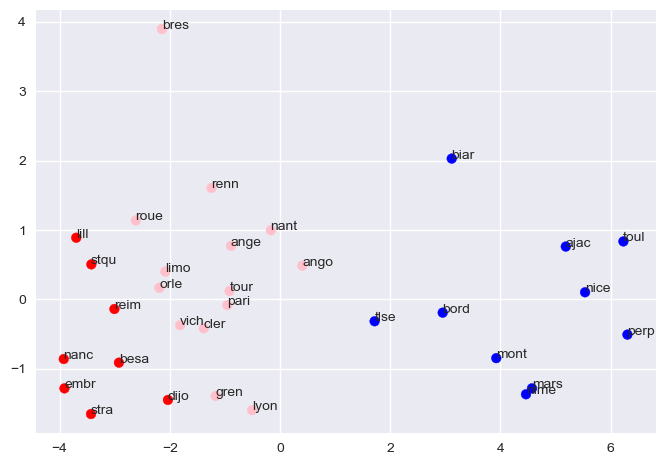

In [133]:
print_clusters(X_pca, labels, clustering.labels_)

## 2. Visualisation des Données : Agglomerative Clustering

**Agglomerative Clustering sur les données normalisées**

In [134]:
aggWard = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_pca)
aggAverage = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X_pca)
aggSingle = AgglomerativeClustering(n_clusters=3, linkage='single').fit(X_pca)

**Visualisation avec la méthode d'aggregation Ward**

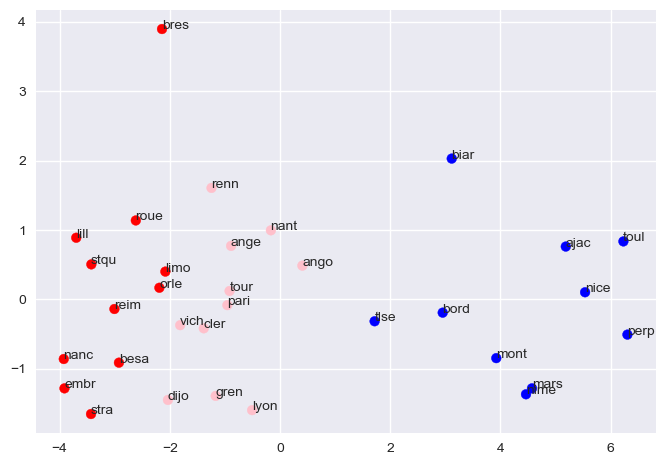

In [135]:
print_clusters(X_pca, labels, aggWard.labels_)

**Visualisation avec la méthode d'aggregation Average**

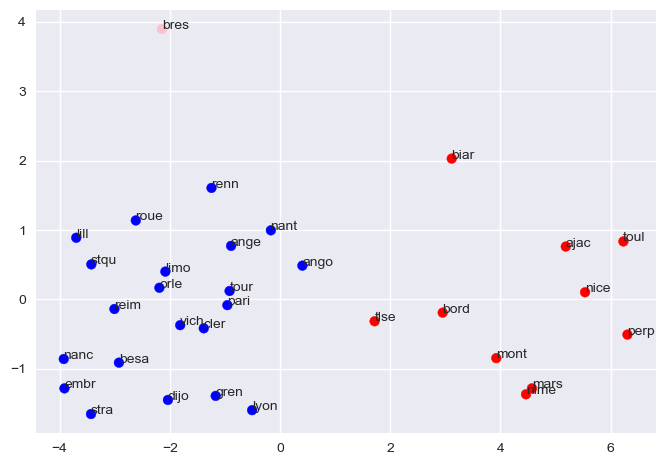

In [136]:
print_clusters(X_pca, labels, aggAverage.labels_)

**Visualisation avec la méthode d'aggregation Single**

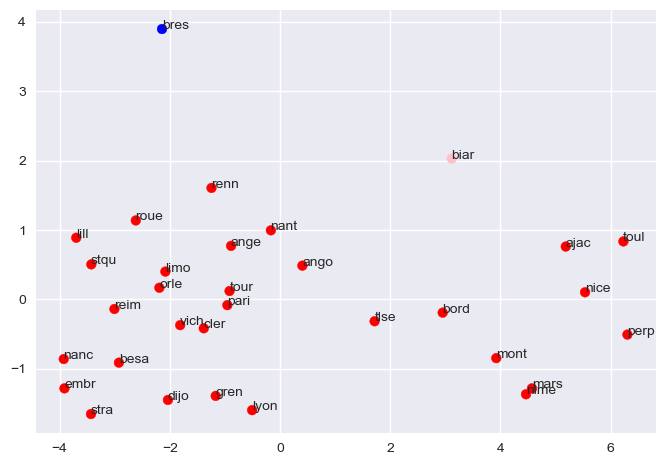

In [205]:
#Affichage des 3 clusters de l'agglomerative clustering avec le linkage single
print_clusters(X_pca, labels, aggSingle.labels_)

## 3. Determiner la meilleure partition : Silhouette

**Récupération du meilleur scores de silhouette en fonction du nombre de clusters (2 à 6)**

In [192]:
def silhouette(X, fct, param):
    meilleur_score = 0
    meilleur_nb_partition = 0
    scores=[]
    #Calcul des scores de silhouette pour k=2,3,4,5,6
    for k in range(2,7):
        clustering = fct(n_clusters=k, **param).fit(X)
        score = silhouette_score(
            X,
            labels=clustering.labels_,
            metric="euclidean",
            sample_size=300,
        )    
        #Trouver le meilleur score et le nombre de partition associé
        print("k = ", k, "score = ", score)
        if score > meilleur_score:
            meilleur_score = score
            meilleur_nb_partition = k
        scores.append(score)
    #Affichage des scores de silhouette en histogramme
    plt.bar(range(2,7), scores)
    return meilleur_nb_partition, meilleur_score

### K-Means Silhouette

k =  2 score =  0.6341345030494504
k =  3 score =  0.401235255874857
k =  4 score =  0.4064677628289662
k =  5 score =  0.34782472948242754
k =  6 score =  0.34450406666923516
Meilleur nombre de partition :  2
score :  0.6341345030494504


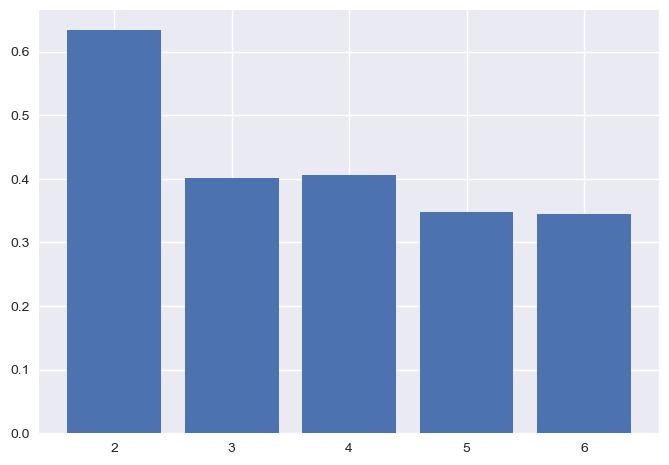

In [197]:
#Silhouette pour le Kmeans
nb_part, score = silhouette(X_pca,KMeans,{})
print("Meilleur nombre de partition : ", nb_part)
print("score : ", score)

### Agglomerative Clustering Silhouette

**Ward**

k =  2 score =  0.6341345030494505
k =  3 score =  0.3815373989810241
k =  4 score =  0.397148428850604
k =  5 score =  0.3455124588793177
k =  6 score =  0.3390578944927679
Meilleur nombre de partition :  2
score :  0.6341345030494504


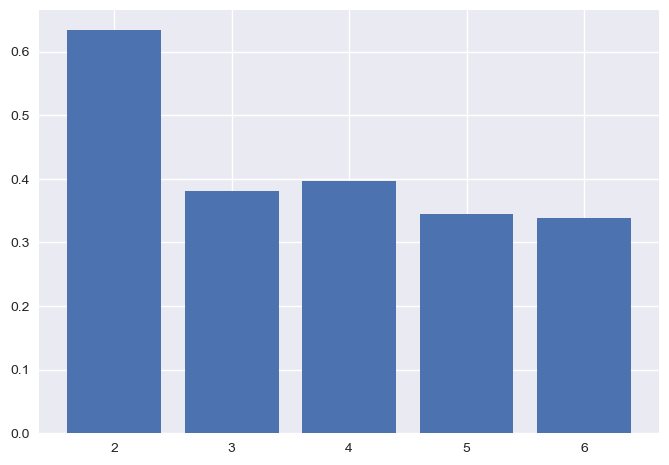

In [198]:
#Silhouette pour l'agglomerative clustering avec le linkage ward
nb_part, score = silhouette(X_pca,AgglomerativeClustering,{'linkage':'ward'})
print("Meilleur nombre de partition : ", nb_part)
print("score : ", score)

**Average**

k =  2 score =  0.6341345030494504
k =  3 score =  0.5067547529956746
k =  4 score =  0.41280862301884946
k =  5 score =  0.3528957440943905
k =  6 score =  0.3319855420409869


(2, 0.6341345030494504)

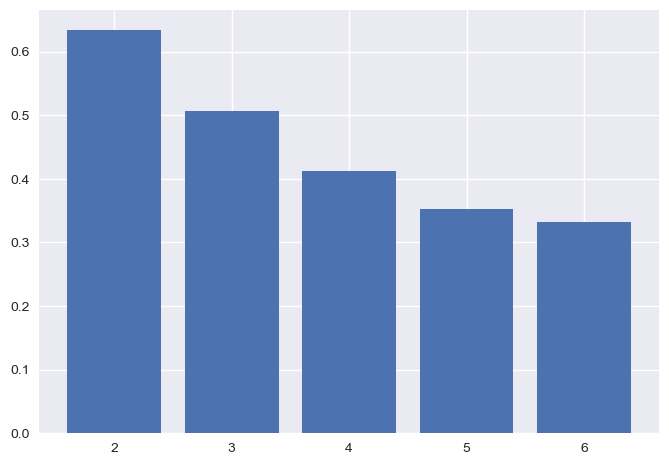

In [195]:
#Silhouette pour l'agglomerative clustering avec le linkage average
nb_part, score = silhouette(X_pca,AgglomerativeClustering,{'linkage':'average'})
print("Meilleur nombre de partition : ", nb_part)
print("score : ", score)

**Single**

k =  2 score =  0.18399880470222796
k =  3 score =  -0.03165325510003583
k =  4 score =  0.1917961254123293
k =  5 score =  0.42394951020270677
k =  6 score =  0.3358347913161447
Meilleur nombre de partition :  2
score :  0.6341345030494504


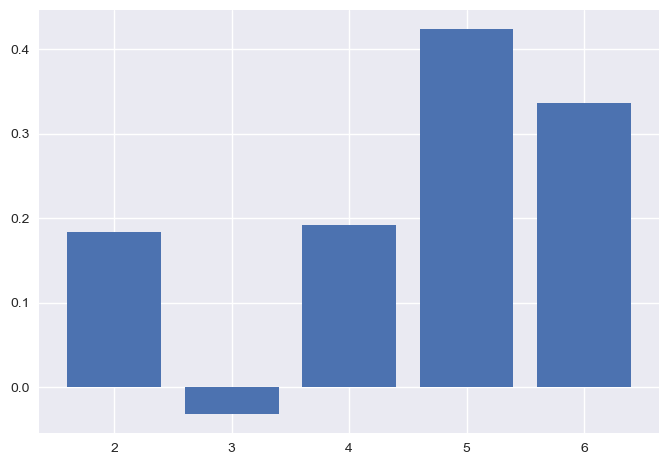

In [199]:
#Silhouette pour l'agglomerative clustering avec le linkage single
nb_part, score = silhouette(X_pca,AgglomerativeClustering,{'linkage':'single'})
print("Meilleur nombre de partition : ", nb_part)
print("score : ", score)

**Exemple d'AgglomerativeClustering avec le meilleur nombre de clusters**


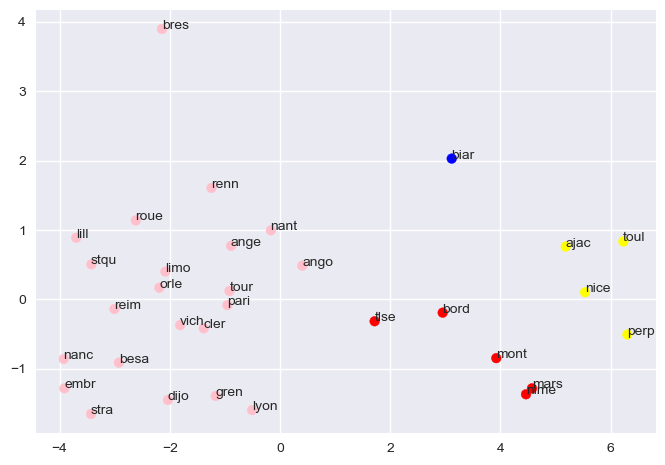

In [209]:
aggSingle_ = AgglomerativeClustering(n_clusters=5, linkage='single').fit(X)
print_clusters(X_pca, labels, aggSingle_.labels_)

## 5. La meilleure partition pour 3 Clusters

**Agglomerative Clustering avec la méthode d'aggregation Average**

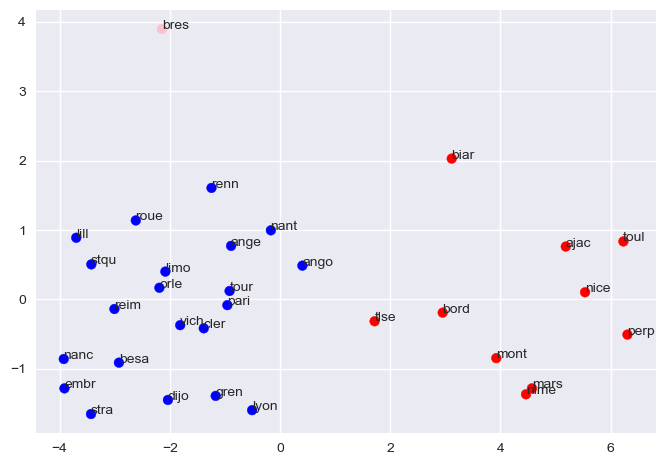

In [210]:
aggAvg_ = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)
print_clusters(X_pca, labels, aggAvg_.labels_)

## Les avantages et inconvénients de KMeans :
> ### Avantages :
    >  - Simple à implémenter
    > - Resultats faciles à interpréter
    > - Rapide
    > - Efficace pour les grandes quantitées de données
    </br> </br>

> ### Inconvénients :
    > - Nécessite de fixer un hyperparamètre (nombre de clusters)
    > - Dépends de la position initiale des centres.
    > - Sensibles aux valeurs aberrantes
    </br> </br>


## Les avantages et inconvénients de AgglomerativeClustering :
> ### Avantages :
    > - Facile à implémenter
    > - Gère les différents types de données
    </br> </br>

> ### Inconvénients :
    > - Il faut choisir la méthode d'aggregation
    </br> </br>


In [201]:
#Affichage sans les labels
def print_cluster_(X, clustering):
    colors = ['red','yellow','blue','pink']
    plt.scatter(X[:,0], X[:,1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
    plt.show()

## 7. Fonction hybride : KMeans + AgglomerativeClustering

In [202]:
from sklearn.neighbors import NearestCentroid

def hybrid_clustering(X, n_clusters_kmeans):
    # Effectuer le clustering KMeans avec le nombre de clusters donné
    kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=0).fit(X)
    centers = kmeans.cluster_centers_
    
    # Effectuer le clustering agglomératif sur les centres obtenus avec KMeans
    agg = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(centers)
    
    # Obtenir les centres des clusters de l'agglomératif pour utiliser comme initiaux pour le KMeans final
    agg_centers = NearestCentroid().fit(centers, agg.labels_).centroids_
    
    # Effectuer le clustering KMeans final avec les centres de l'agglomératif
    kmeans_final = KMeans(n_clusters=3, init=agg_centers, random_state=0).fit(X)
    
    return kmeans_final

**Fonction hybride pour le dataset des villes**

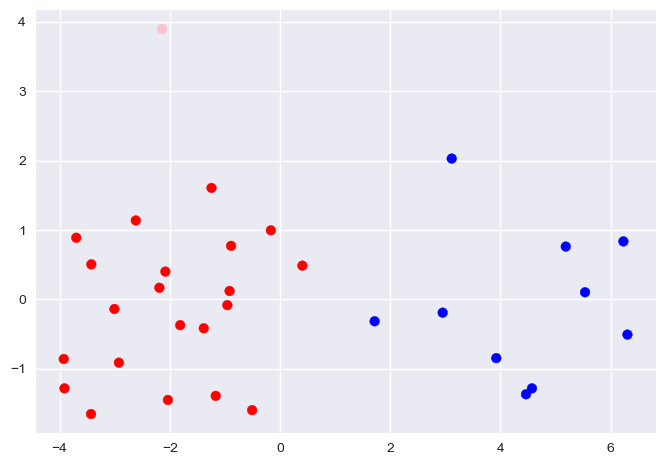

In [203]:
hybrid_villes = hybrid_clustering(X, 10)
print_cluster_(X_pca, hybrid_villes.labels_)

**Fonction hybride pour le dataset wdbc**

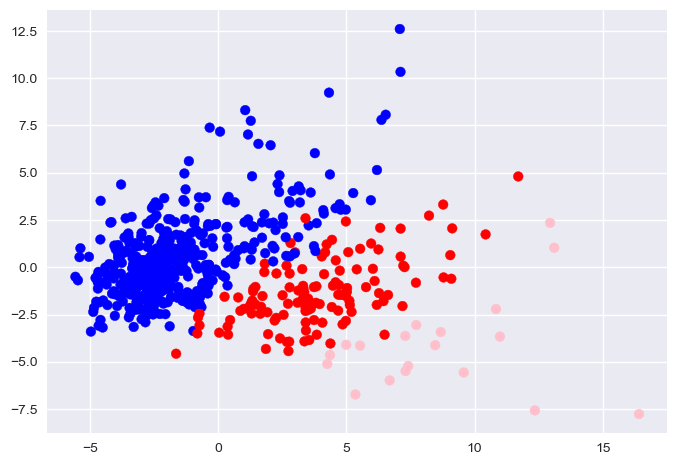

In [145]:
#importation des données
data = pd.read_csv('./wdbc.csv', sep=';')
X_wdbc = data.values


hybrid_wdbc = hybrid_clustering(X_wdbc, 10)
X_wdbc_pca = scale_pca(X_wdbc)
print_cluster_(X_wdbc_pca, hybrid_wdbc.labels_)

**Fonction hybride pour le dataset spamb**

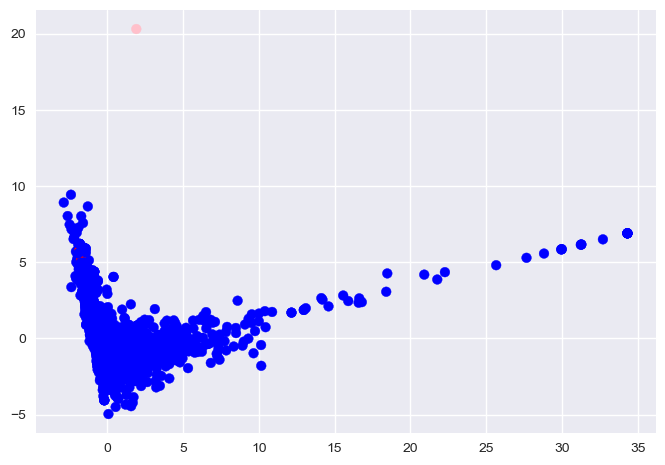

In [173]:
data = pd.read_csv('./spamb.csv', sep=';')
X_spamb = data.values


hybrid_spamb = hybrid_clustering(X_spamb, 10)
X_spamb_pca = scale_pca(X_spamb)
print_cluster_(X_spamb_pca,hybrid_spamb.labels_)

**Affichage des clusters en 3D**

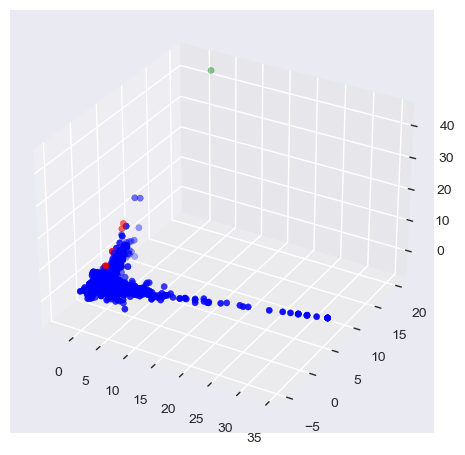

In [172]:
def print_clusters_3d(X, clustering):
    colors = ['red','yellow','blue','green']
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
    plt.show()

print_clusters_3d(X_spamb_pca, hybrid_spamb.labels_)
